🧪 1. K-Means Clustering

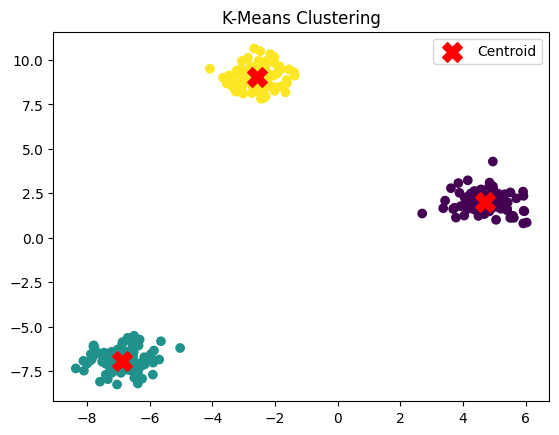

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Buat dataset blob (3 cluster)
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)

# K-Means
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot hasil
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroid')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

📊 2. Evaluasi K-Means: Inertia & Elbow Method

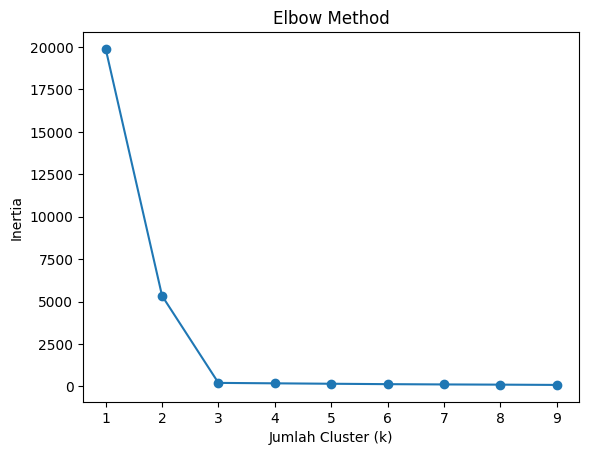

In [26]:
inertias = []
k_values = range(1, 10)

for k in k_values:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)

# Elbow plot
plt.plot(k_values, inertias, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

🧭 3. Evaluasi: Silhouette Score

In [27]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_kmeans)
print("Silhouette Score:", score)

Silhouette Score: 0.9083834454815235


🌪️ 4. DBSCAN

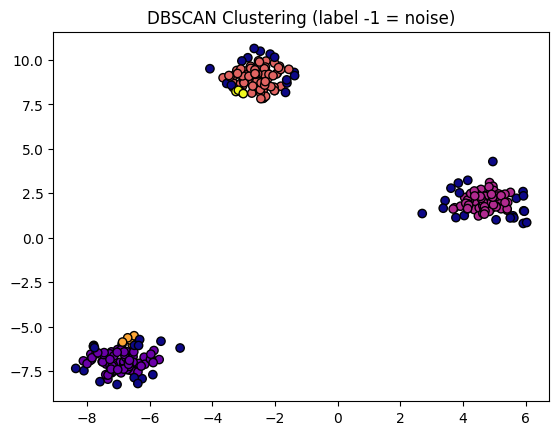

Label DBSCAN: [-1  0  1  2  3  4]


In [28]:
from sklearn.cluster import DBSCAN
import numpy as np

# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
db_labels = dbscan.fit_predict(X)

# Plot hasil
plt.scatter(X[:, 0], X[:, 1], c=db_labels, cmap='plasma', edgecolor='k')
plt.title("DBSCAN Clustering (label -1 = noise)")
plt.show()

# Tampilkan label unik
print("Label DBSCAN:", np.unique(db_labels))

🔔 5. Gaussian Mixture Model (GMM)

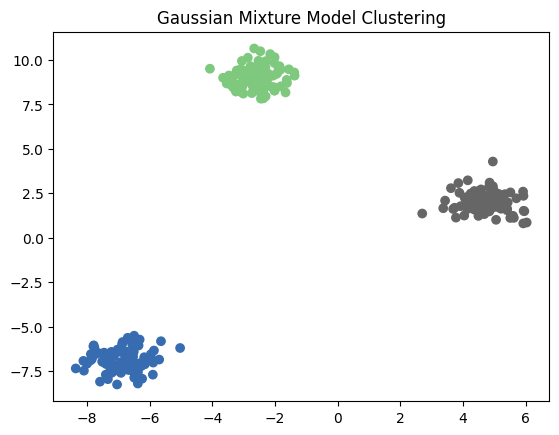

Probabilitas cluster (5 data pertama):
[[3.13845857e-177 1.00000000e+000 1.56850389e-158]
 [2.74274950e-173 1.00000000e+000 5.90753130e-158]
 [1.00000000e+000 3.51724229e-149 1.26224495e-048]
 [2.34238640e-069 2.17648048e-121 1.00000000e+000]
 [6.95161179e-185 1.00000000e+000 1.26029502e-173]]


In [29]:
from sklearn.mixture import GaussianMixture

# GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)
gmm_labels = gmm.predict(X)
probs = gmm.predict_proba(X)  # Probabilitas keanggotaan cluster

# Plot hasil
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap="Accent")
plt.title("Gaussian Mixture Model Clustering")
plt.show()

# Contoh probabilitas dari 5 data pertama
print("Probabilitas cluster (5 data pertama):")
print(probs[:5])

## ✅ Penjelasan Singkat:

* **KMeans**: Efektif untuk data bentuk bulat, cepat dihitung, evaluasi mudah.
* **DBSCAN**: Bisa temukan cluster bentuk bebas dan noise, tapi sensitif ke `eps`.
* **GMM**: Berbasis probabilitas, bisa menangkap overlap antar cluster.